Lithion power is the largest producer of electric vehicle batteries. Lithion Power has a variable pricing model based on the driver's drving history. Thus, I am creating a cluster model so that the drivers will be incentivized based on the cluster.

In [8]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 

In [3]:
df = pd.read_csv(r"Datasets\driver-data.csv")
df.head(5)

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [4]:
df.shape

(4000, 3)

In [7]:
#Drop unnecessary column and check for null values. 
features = df.drop(['id'], axis = 1)
features.head(5)
features.isnull().sum()

mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

In [11]:
#Normalizing the data points
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features

array([[-0.0898104 ,  1.26061251],
       [-0.43977285,  1.04174351],
       [-0.215131  ,  1.18765617],
       ...,
       [ 1.77447381,  0.09331115],
       [ 1.87229869, -0.41738319],
       [ 1.72060465, -0.12555785]])

In [13]:
#Implementing K-Means algorithm 
kmeans = KMeans(init="random",n_clusters=5,random_state=42)
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=5, random_state=42)

In [14]:
#Using the Elbow method to find the optimal number clusters
sse = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, init = "random", random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

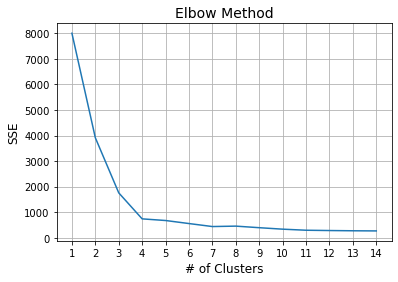

In [17]:
plt.plot(range(1,15), sse)
plt.xlabel("# of Clusters", size=12)
plt.ylabel("SSE", size=12)
plt.title("Elbow Method", size = 14)
plt.xticks(range(1,15))
plt.grid()
plt.show()

In [21]:
#Analyzing the above plot indicates that optical no. of clusters is 4 
kmeans = KMeans(n_clusters=4, init = "random", random_state=42)
kmeans.fit(scaled_features)
print(kmeans.labels_)
print(len(kmeans.labels_))

[0 0 0 ... 1 1 1]
4000


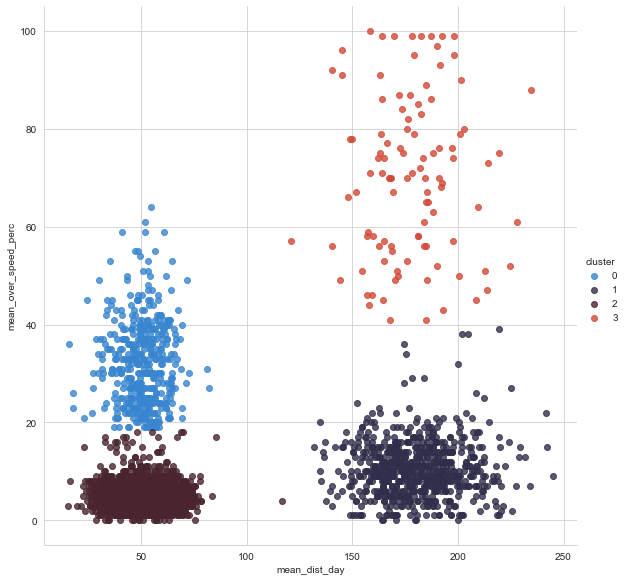

In [25]:
features['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc', data = features, hue='cluster',palette = 'icefire', size=8, fit_reg = False)